In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/gitpod/.pyenv/versions/3.11.1/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['partition', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Lista desordenada [634]
Lista ordenada usando Insertion Sort: [634]
Lista ordenada usando Quick Sort: [634]
Lista ordenada usando Merge Sort: [634]
Lista desordenada [874, 815]
Lista ordenada usando Insertion Sort: [815, 874]
Lista ordenada usando Quick Sort: [815, 874]
Lista ordenada usando Merge Sort: [815, 874]
Lista desordenada [898, 530, 802]
Lista ordenada usando Insertion Sort: [530, 802, 898]
Lista ordenada usando Quick Sort: [530, 802, 898]
Lista ordenada usando Merge Sort: [530, 802, 898]
Lista desordenada [709, 626, 169, 876]
Lista ordenada usando Insertion Sort: [169, 626, 709, 876]
Lista ordenada usando Quick Sort: [169, 626, 709, 876]
Lista ordenada usando Merge Sort: [169, 626, 709, 876]
Lista desordenada [439, 68, 784, 963, 1]
Lista ordenada usando Insertion Sort: [1, 68, 439, 784, 963]
Lista ordenada usando Quick Sort: [1, 68, 439, 784, 963]
Lista ordenada usando Merge Sort: [1, 68, 439, 784, 963]
Lista desordenada [550, 220, 977, 223, 681, 863]
Lista ordenada usando I

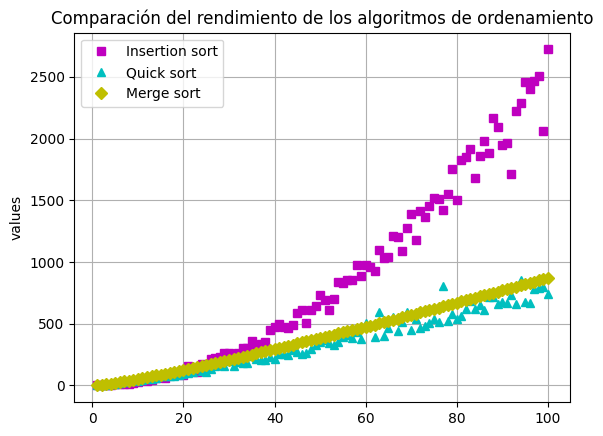

In [4]:
import matplotlib.pyplot as plt # Importando la librería Matplotlib para crear gráficos
from mpl_toolkits.mplot3d import Axes3D # Importando Axes3D de mpl_toolkits.mplot3d para crear gráficos 3D
import random # Importando la librería random para generar números aleatorios

times = 0 # Variable para llevar un registro del número de veces que el algoritmo de ordenamiento tarda en ordenar la lista.

# Algoritmo de ordenamiento por inserción
def insertionSort_graph(n_lista):
    global times # Accediendo a la variable global times
    for index in range(1, len(n_lista)):
        times+=1 # Incrementando el contador cada vez que se ejecuta el bucle
        actual = n_lista[index]
        posicion = index
        while (posicion > 0 and n_lista[posicion-1]>actual):
            times += 1 # Incrementando el contador cada vez que se ejecuta el bucle
            n_lista[posicion] = n_lista[posicion-1]
            posicion = posicion-1
        n_lista[posicion] = actual
    return n_lista

# Función de partición para el algoritmo QuickSort
def partition(lista,low,high):
    global times # Accediendo a la variable global times
    i = ( low-1 )
    pivot = lista[high]
    for j in range(low , high):
        times += 1 # Incrementando el contador cada vez que se ejecuta el bucle
        if lista[j] <= pivot:
            i = i+1
            lista[i],lista[j] = lista[j],lista[i]
    lista[i+1],lista[high] = lista[high],lista[i+1]
    return ( i+1 )

# Algoritmo QuickSort
def quickSort_graph(lista,low,high):
    global times # Accediendo a la variable global times
    times += 1 # Incrementando el contador cada vez que se llama a la función recursiva
    if low < high:
        pi = partition(lista,low,high)
        quickSort_graph(lista, low, pi-1)
        quickSort_graph(lista, pi+1, high)

# Algoritmo MergeSort
def mergeSort_graph(lista):
    global times # Accediendo a la variable global times
    times += 1 # Incrementando el contador cada vez que se llama a la función recursiva
    if len(lista) > 1:
        mid = len(lista)//2
        L = lista[:mid]
        R = lista[mid:]
        mergeSort_graph(L)
        mergeSort_graph(R)
        i = j = k = 0
        while i < len(L) and j < len(R):
            times += 1 # Incrementando el contador cada vez que se ejecuta el bucle
            if L[i] < R[j]:
                lista[k] = L[i]
                i+= 1
            else:
                lista[k] = R[j]
                j+= 1
            k+= 1

        while i < len(L):
            times += 1 # Incrementando el contador cada vez que se ejecuta el bucle
            lista[k] = L[i]
            i+= 1
            k+= 1

        while j < len(R):
            times += 1 # Incrementando el contador cada vez que se ejecuta el bucle
            lista[k] = R[j]
            j+= 1
            k+= 1

TAM = 101 # Tamaño de la lista a ordenar

eje_x = list(range(1, TAM, 1))
eje_y_insertion_sort = []
eje_y_quick_sort = []
eje_y_merge_sort = []

for num in eje_x:
    lista_variable_insertion_sort = random.sample(range(0 , 1000), num) # Generando una lista aleatoria de números de tamaño num.
    lista_variable_quick_sort = lista_variable_insertion_sort.copy() # Creando una copia de la lista para ordenarla usando Quick Sort.
    lista_variable_merge_sort = lista_variable_insertion_sort.copy() # Creando una copia de la lista para ordenarla usando Merge Sort.

    print(f"Lista desordenada {lista_variable_insertion_sort}")

    times = 0 # Reiniciando el contador para cada algoritmo de ordenamiento

    # Ordenando usando Insertion Sort y agregando el número de veces a la lista para graficarlo en el gráfico.
    lista_variable_insertion_sort_sorted=insertionSort_graph(lista_variable_insertion_sort)
    eje_y_insertion_sort.append(times)
    print(f"Lista ordenada usando Insertion Sort: {lista_variable_insertion_sort_sorted}")

    # Ordenando usando Quick Sort y agregando el número de veces a la lista para graficarlo en el gráfico.
    times=0 # Reiniciando el contador para cada algoritmo de ordenamiento.
    quickSort_graph(lista_variable_quick_sort,0,len(lista_variable_quick_sort)-1)
    eje_y_quick_sort.append(times)
    print(f"Lista ordenada usando Quick Sort: {lista_variable_quick_sort}")

    # Ordenando usando Merge Sort y agregando el número de veces a la lista para graficarlo en el gráfico.
    times=0 # Reiniciando el contador para cada algoritmo de ordenamiento.
    mergeSort_graph(lista_variable_merge_sort)
    eje_y_merge_sort.append(times)
    print(f"Lista ordenada usando Merge Sort: {lista_variable_merge_sort}")

fig, ax = plt.subplots(facecolor='w', edgecolor='k')
ax.plot(eje_x, eje_y_insertion_sort, marker='s', color='m', linestyle='None')
ax.plot(eje_x, eje_y_quick_sort, marker='^', color='c', linestyle='None')
ax.plot(eje_x, eje_y_merge_sort, marker='D', color='y', linestyle='None')

ax.set_ylabel('values') # Estableciendo la etiqueta para el eje y
ax.grid(True) # Mostrando la cuadrícula en el gráfico
ax.legend(["Insertion sort", "Quick sort", "Merge sort"]) # Agregando una leyenda al gráfico

plt.title("Comparación del rendimiento de los algoritmos de ordenamiento") # Agregando un título al gráfico
plt.show() # Mostrando el gráfico